In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

C:\Users\pars iran\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\pars iran\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\pars iran\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train['defects'] = train['defects'].map({False: 0, True: 1})

In [3]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(train.drop(columns=["defects"]))
test_data_standardized = scaler.transform(test)

In [4]:
# Define the sigmoid function and the LogisticRegression class
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)
        
        for _ in range(self.num_iterations):
            z = np.dot(X, self.theta)
            h = sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / m
            self.theta -= self.learning_rate * gradient

    def predict(self, X):
        z = np.dot(X, self.theta)
        predicted_probabilities = sigmoid(z)
        return predicted_probabilities

In [5]:
# Create a LogisticRegression instance and fit it to the standardized data
log_reg = LogisticRegression()
log_reg.fit(X, train['defects'])

In [6]:
y_sub = log_reg.predict(test_data_standardized)
submission_df = pd.DataFrame({'id': test['id'], 'defects': y_sub})
submission_df.to_csv('submission.csv', index=False)

In [7]:
# Calculate ROC curve and AUC for the training data
fpr, tpr, thresholds = roc_curve(train['defects'], log_reg.predict(X))
roc_auc = auc(fpr, tpr)

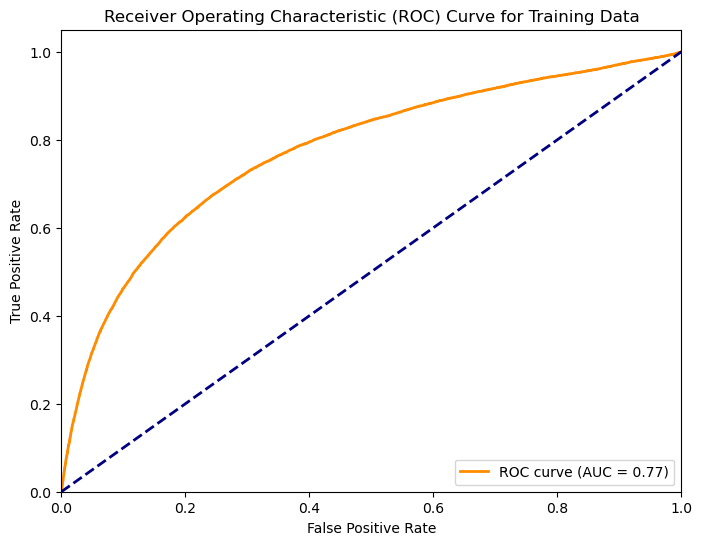

AUC Score for Training Data: 0.77


In [8]:
# Plot the ROC curve for the training data
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Training Data')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score for the training data
print(f'AUC Score for Training Data: {roc_auc:.2f}')